                                   SALES PRODUCT ANALYSIS
                                   
The goal of this analysis is to analyse how your product or service fits into a specific market and where it will gain the most.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
#reading individual data
jan = pd.read_csv("./the_sales/january_2019.csv")
feb = pd.read_csv("./the_sales/february_2019.csv")
mar = pd.read_csv("./the_sales/march_2019.csv")
april = pd.read_csv("./the_sales/april_2019.csv")
may = pd.read_csv("./the_sales/may_2019.csv")
june = pd.read_csv("./the_sales/june_2019.csv")
july = pd.read_csv("./the_sales/july_2019.csv")
aug = pd.read_csv("./the_sales/august_2019.csv")
sep = pd.read_csv("./the_sales/september_2019.csv")
oct_ = pd.read_csv("./the_sales/october_2019.csv")
nov = pd.read_csv("./the_sales/november_2019.csv")
dec = pd.read_csv("./the_sales/december_2019.csv")

In [3]:
#inspecting individual data before merging for analysis
jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


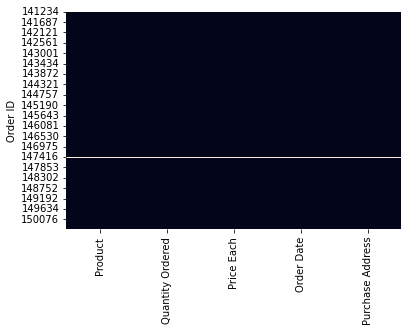

In [6]:
jan_null = jan.set_index("Order ID")
sns.heatmap(jan_null.isnull(), cbar=False);

there appears to missing values consistent across all the columns, lets's investigate the missing values

In [7]:
#investigating missing values
missing = jan[jan["Order ID"].isnull()]
missing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN
3584,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
missing.shape[0]

26

There are missing values in 26 rows across all the columns in the data set, we are going to drop these rows

In [9]:
jan.drop(missing.index, axis=0, inplace=True)

In [12]:
missing = jan[jan["Order ID"].isnull()]
missing.shape[0]

0

the missing values have been dropped

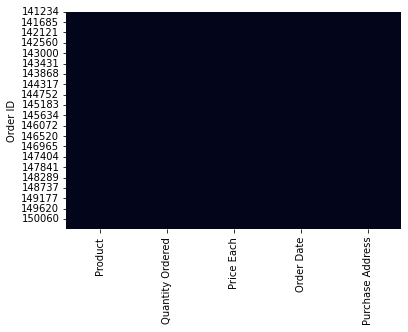

In [14]:
#confirming dropped missing values
jan_null = jan.set_index("Order ID")
sns.heatmap(jan_null.isnull(), cbar=False);

In [15]:
jan["Order ID"].value_counts()

Order ID    16
142287       3
143632       3
147523       3
145660       3
            ..
144382       1
144381       1
144380       1
144379       1
150501       1
Name: Order ID, Length: 9269, dtype: int64

In [16]:
jan["Product"].value_counts()

USB-C Charging Cable          1171
AAA Batteries (4-pack)        1082
Lightning Charging Cable      1068
AA Batteries (4-pack)         1039
Wired Headphones              1005
Apple Airpods Headphones       809
Bose SoundSport Headphones     656
27in FHD Monitor               418
iPhone                         379
Google Phone                   317
34in Ultrawide Monitor         313
27in 4K Gaming Monitor         312
Flatscreen TV                  243
Macbook Pro Laptop             235
ThinkPad Laptop                216
20in Monitor                   213
Vareebadd Phone                124
LG Washing Machine              42
LG Dryer                        39
Product                         16
Name: Product, dtype: int64

In [17]:
jan["Price Each"].value_counts()

11.95         1171
2.99          1082
14.95         1068
3.84          1039
11.99         1005
150            809
99.99          656
149.99         418
700            379
600            317
379.99         313
389.99         312
300            243
1700           235
999.99         216
109.99         213
400            124
600.0           81
Price Each      16
Name: Price Each, dtype: int64

critically inspecting each column, there appears to be 16 rows in all the columns with irregular data, we will investigate

In [19]:
jan_bad_data = jan[jan["Order ID"] == "Order ID"]
jan_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3247,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3612,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4901,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


we will drop these rows as well

In [20]:
jan.drop(jan_bad_data.index, axis=0, inplace=True)

In [21]:
#confirming the dropped rows
jan_bad_data = jan[jan["Order ID"] == "Order ID"]
jan_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
#we seem to be left with cleaned data, but we will convert the date to pandas date time
import datetime as dt
jan["Order Date"] = pd.to_datetime(jan["Order Date"])

In [24]:
jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [25]:
jan.shape[0]

9681

In [26]:
feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


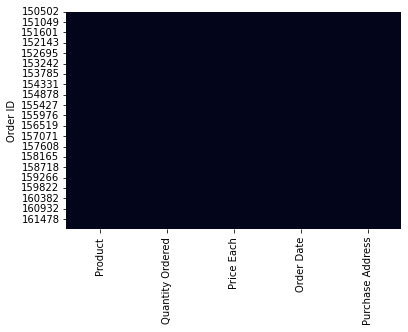

In [27]:
feb_null = feb.set_index("Order ID")
sns.heatmap(feb_null.isnull(), cbar=False);

In [28]:
feb["Order ID"].value_counts()

Order ID    18
160873       5
150925       3
154707       3
151568       3
            ..
154416       1
154418       1
154419       1
154420       1
162008       1
Name: Order ID, Length: 11508, dtype: int64

In [29]:
feb["Product"].value_counts()

USB-C Charging Cable          1514
Lightning Charging Cable      1393
AAA Batteries (4-pack)        1324
AA Batteries (4-pack)         1276
Wired Headphones              1186
Apple Airpods Headphones      1011
Bose SoundSport Headphones     834
27in FHD Monitor               471
iPhone                         439
27in 4K Gaming Monitor         426
34in Ultrawide Monitor         416
Google Phone                   379
Flatscreen TV                  313
ThinkPad Laptop                277
Macbook Pro Laptop             275
20in Monitor                   245
Vareebadd Phone                129
LG Washing Machine              40
LG Dryer                        38
Product                         18
Name: Product, dtype: int64

we will drop 18 bad data in the february data

In [159]:
#investigating missing values
missing_feb = feb[feb["Order ID"].isnull()]
missing_feb

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaT,NaN
169,NaN,NaN,NaN,NaN,NaT,NaN
172,NaN,NaN,NaN,NaN,NaT,NaN
1488,NaN,NaN,NaN,NaN,NaT,NaN
1517,NaN,NaN,NaN,NaN,NaT,NaN
1774,NaN,NaN,NaN,NaN,NaT,NaN
1973,NaN,NaN,NaN,NaN,NaT,NaN
2027,NaN,NaN,NaN,NaN,NaT,NaN
2412,NaN,NaN,NaN,NaN,NaT,NaN
2532,NaN,NaN,NaN,NaN,NaT,NaN


In [160]:
feb.drop(missing_feb.index, axis=0, inplace=True)

In [30]:
feb_bad_data = feb[feb["Order ID"] == "Order ID"]
feb_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3128,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3142,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3360,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3426,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3831,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
feb.drop(feb_bad_data.index, axis=0, inplace=True)

In [32]:
feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [33]:
mar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


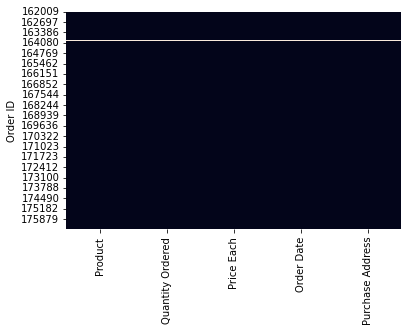

In [34]:
mar_null = mar.set_index("Order ID")
sns.heatmap(mar_null.isnull(), cbar=False);

In [35]:
#investigating missing values
missing_mar = mar[mar["Order ID"].isnull()]
missing_mar

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN
2346,NaN,NaN,NaN,NaN,NaN,NaN
2984,NaN,NaN,NaN,NaN,NaN,NaN
3030,NaN,NaN,NaN,NaN,NaN,NaN
3297,NaN,NaN,NaN,NaN,NaN,NaN
3467,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
mar.drop(missing_mar.index, axis=0, inplace=True)

In [37]:
missing_mar = mar[mar["Order ID"].isnull()]
missing_mar

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [38]:
mar["Order ID"].value_counts()

Order ID    35
165665       4
162009       3
168607       3
163257       3
            ..
167235       1
167236       1
167237       1
167238       1
169283       1
Name: Order ID, Length: 14550, dtype: int64

In [39]:
mar_bad_data = mar[mar["Order ID"] == "Order ID"]
mar_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2107,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2485,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2728,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4022,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [41]:
mar.drop(mar_bad_data.index, axis=0, inplace=True)

In [42]:
mar_bad_data = mar[mar["Order ID"] == "Order ID"]
mar_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [43]:
mar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [44]:
april.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


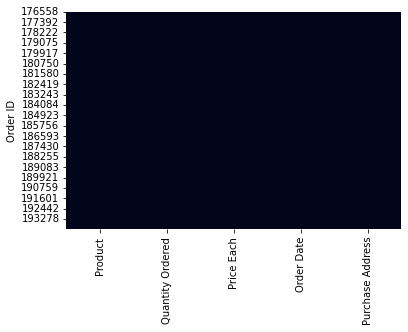

In [45]:
april_null = april.set_index("Order ID")
sns.heatmap(april_null.isnull(), cbar=False);

In [46]:
#investigating missing values
missing_april = april[april["Order ID"].isnull()]
missing_april

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
april.drop(missing_april.index, axis=0, inplace=True)

In [48]:
missing_april = april[april["Order ID"].isnull()]
missing_april

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [49]:
april["Order ID"].value_counts()

Order ID    35
178158       4
193511       4
188533       3
183016       3
            ..
182524       1
182525       1
182526       1
182527       1
194094       1
Name: Order ID, Length: 17538, dtype: int64

In [50]:
april_bad_data = april[april["Order ID"] == "Order ID"]
april_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [51]:
april.drop(april_bad_data.index, axis=0, inplace=True)

In [52]:
april_bad_data = april[april["Order ID"] == "Order ID"]
april_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [53]:
april.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [54]:
may.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [57]:
#investigating missing values
missing_may = may[may["Order ID"].isnull()]
missing_may

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN
1738,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN
2407,NaN,NaN,NaN,NaN,NaN,NaN
2570,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
may.drop(missing_may.index, axis=0, inplace=True)

In [59]:
missing_may = may[may["Order ID"].isnull()]
missing_may

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [60]:
may["Order ID"].value_counts()

Order ID    33
194253       4
196615       4
206097       3
196014       3
            ..
199495       1
199496       1
199497       1
199499       1
209920       1
Name: Order ID, Length: 15827, dtype: int64

In [61]:
may_bad_data = may[may["Order ID"] == "Order ID"]
may_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2945,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3043,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3936,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4466,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5074,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [62]:
may.drop(may_bad_data.index, axis=0, inplace=True)

In [63]:
missing_may = may[may["Order ID"].isnull()]
missing_may

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [64]:
june.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [65]:
#investigating missing values
missing_june = june[june["Order ID"].isnull()]
missing_june

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
1415,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1704,NaN,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN,NaN
1861,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
june.drop(missing_june.index, axis=0, inplace=True)

In [67]:
missing_june = june[june["Order ID"].isnull()]
missing_june

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [68]:
june_bad_data = june[june["Order ID"] == "Order ID"]
june_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3212,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3918,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4197,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4229,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4329,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [69]:
june.drop(june_bad_data.index, axis=0, inplace=True)

In [70]:
june_bad_data = june[june["Order ID"] == "Order ID"]
june_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [71]:
#investigating missing values
missing_july = july[july["Order ID"].isnull()]
missing_july

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
1666,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN
2631,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
july.drop(missing_july.index, axis=0, inplace=True)

In [73]:
missing_july = july[july["Order ID"].isnull()]
missing_july

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [74]:
july_bad_data = july[july["Order ID"] == "Order ID"]
july_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2951,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3447,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3493,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3513,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [75]:
july.drop(july_bad_data.index, axis=0, inplace=True)

In [76]:
july_bad_data = july[july["Order ID"] == "Order ID"]
july_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [77]:
aug.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [78]:
#investigating missing values
missing_aug = aug[aug["Order ID"].isnull()]
missing_aug

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
3310,NaN,NaN,NaN,NaN,NaN,NaN
4288,NaN,NaN,NaN,NaN,NaN,NaN
4304,NaN,NaN,NaN,NaN,NaN,NaN
4454,NaN,NaN,NaN,NaN,NaN,NaN
4678,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
aug.drop(missing_aug.index, axis=0, inplace=True)

In [80]:
aug_bad_data = aug[aug["Order ID"] == "Order ID"]
aug_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1729,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2304,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2568,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2668,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [81]:
aug.drop(aug_bad_data.index, axis=0, inplace=True)

In [82]:
aug_bad_data = aug[aug["Order ID"] == "Order ID"]
aug_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [83]:
#investigating missing values
missing_sep = sep[sep["Order ID"].isnull()]
missing_sep

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN
1465,NaN,NaN,NaN,NaN,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN,NaN
2556,NaN,NaN,NaN,NaN,NaN,NaN
2795,NaN,NaN,NaN,NaN,NaN,NaN
3602,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
sep.drop(missing_sep.index, axis=0, inplace=True)

In [85]:
sep_bad_data = sep[sep["Order ID"] == "Order ID"]
sep_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6204,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8644,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9325,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [86]:
sep.drop(sep_bad_data.index, axis=0, inplace=True)

In [87]:
sep_bad_data = sep[sep["Order ID"] == "Order ID"]
sep_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [88]:
#investigating missing values
missing_oct = oct_[oct_["Order ID"].isnull()]
missing_oct

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17919,NaN,NaN,NaN,NaN,NaN,NaN
18308,NaN,NaN,NaN,NaN,NaN,NaN
18768,NaN,NaN,NaN,NaN,NaN,NaN
19143,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
oct_.drop(missing_oct.index, axis=0, inplace=True)

In [91]:
oct_bad_data = oct_[oct_["Order ID"] == "Order ID"]
oct_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4265,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5735,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5886,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6182,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6567,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [92]:
oct_.drop(oct_bad_data.index, axis=0, inplace=True)

In [93]:
oct_bad_data = oct_[oct_["Order ID"] == "Order ID"]
oct_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [94]:
#investigating missing values
missing_nov = nov[nov["Order ID"].isnull()]
missing_nov

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN
2087,NaN,NaN,NaN,NaN,NaN,NaN
2093,NaN,NaN,NaN,NaN,NaN,NaN
2621,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
nov.drop(missing_nov.index, axis=0, inplace=True)

In [96]:
nov_bad_data = nov[nov["Order ID"] == "Order ID"]
nov_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2129,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2307,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2661,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3122,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3317,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [97]:
nov.drop(nov_bad_data.index, axis=0, inplace=True)

In [98]:
#investigating missing values
missing_dec = dec[dec["Order ID"].isnull()]
missing_dec

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
dec.drop(missing_dec.index, axis=0, inplace=True)

In [100]:
dec_bad_data = dec[dec["Order ID"] == "Order ID"]
dec_bad_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3793,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3812,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4218,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5143,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5293,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [101]:
dec.drop(dec_bad_data.index, axis=0, inplace=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [105]:
feb["Order Date"] = pd.to_datetime(feb["Order Date"])
mar["Order Date"] = pd.to_datetime(mar["Order Date"])
april["Order Date"] = pd.to_datetime(april["Order Date"])
may["Order Date"] = pd.to_datetime(may["Order Date"])
june["Order Date"] = pd.to_datetime(june["Order Date"])
july["Order Date"] = pd.to_datetime(july["Order Date"])
aug["Order Date"] = pd.to_datetime(aug["Order Date"])
sep["Order Date"] = pd.to_datetime(sep["Order Date"])
oct_["Order Date"] = pd.to_datetime(oct_["Order Date"])
nov["Order Date"] = pd.to_datetime(nov["Order Date"])
dec["Order Date"] = pd.to_datetime(dec["Order Date"])

In [108]:
dec.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [161]:
combined_sales = pd.concat([jan, feb, mar, april, may, june, july, aug, sep, oct_, nov, dec], axis=0)
combined_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [163]:
#total number of sales
combined_sales.shape[0]

185950

total number of sales is 185950

In [164]:
combined_sales["month"] = combined_sales['Order Date'].dt.month

In [165]:
combined_sales["month"].value_counts(dropna=False)

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: month, dtype: int64

In [166]:
missings = combined_sales[combined_sales["Order ID"].isnull()]
missings

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


In [167]:
combined_sales["month"].value_counts(dropna=False)

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: month, dtype: int64

In [168]:
combined_sales["month"] = combined_sales["month"].astype(int)

In [170]:
#average sales per month
combined_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [178]:
combined_sales["Price Each"] = combined_sales["Price Each"].astype(float)

In [179]:
def function(quantities, prices):
    products = []
    for quantity, price in zip(quantities, prices):
        product = quantity * price
        products.append(product)
    average = sum(products) / len(products)
    return average
round(function(combined_sales["Quantity Ordered"], combined_sales["Price Each"]), 2)

185.49

In [180]:
#sales made from each order
combined_sales["sales_price"] = combined_sales["Quantity Ordered"] * combined_sales["Price Each"]
round(combined_sales["sales_price"].mean(), 2)

185.49

the average sales of the year is 185.9

In [181]:
combined_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_price
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99


In [186]:
average_montly_sales = combined_sales.groupby("month")["sales_price"].mean().sort_values(ascending=False)
average_montly_sales

month
5     190.305852
6     190.187565
1     187.687376
8     187.648849
4     185.495390
3     185.250471
7     185.249826
12    184.655913
10    184.238580
2     183.884962
11    182.074956
9     180.497387
Name: sales_price, dtype: float64

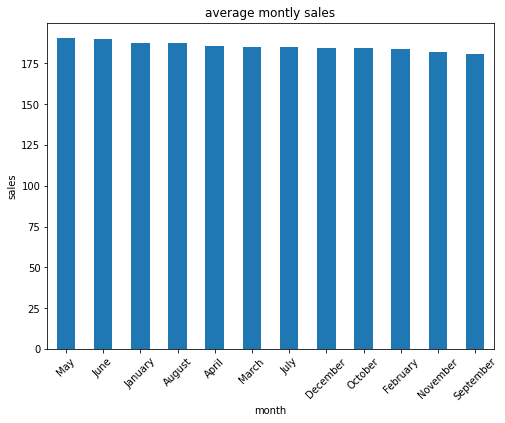

In [191]:
average_montly_sales.plot(kind="bar", title="average montly sales", figsize=(8,6), ylabel="sales")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["May", "June", "January", "August", "April", "March", "July", "December", "October", "February", "November", "September"], rotation=45)
plt.xlabel = "months"

monthly average sales are relatively close with the highest in may, 190 and the lowest in september 180

In [192]:
#revenue made per month
montly_sales = combined_sales.groupby("month")["sales_price"].sum().sort_values(ascending=False)
montly_sales

month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: sales_price, dtype: float64

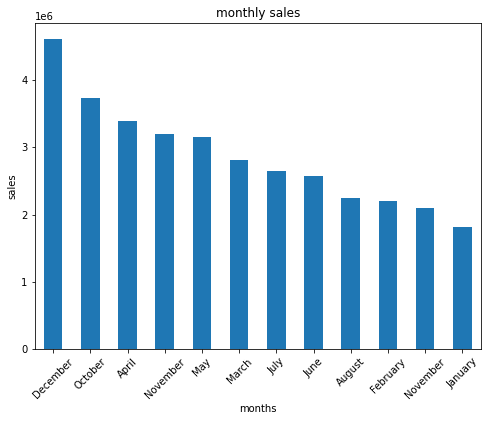

In [196]:
montly_sales.plot(kind="bar", title="monthly sales", figsize=(8,6), ylabel="sales", xlabel="months")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["December", "October", "April", "November", "May", "March", "July", "June", "August", "February", "November", "January"], rotation=45);

the total revenue made in december is far above what were made in the other months, highest sales is recorded in December. january has the lowest sales. The best month of sale is December when 4,613,443 is generated

In [198]:
#demographics of customers
combined_sales.shape[0]

185950

In [199]:
patterns = r",\s.+,"
pattern = r",\s(\w.+),"

In [203]:
combined = combined_sales[combined_sales["Purchase Address"].str.contains(patterns, flags=re.I)]
combined_sales["demography"] = combined["Purchase Address"].str.extract(pattern, flags=re.I, expand=False)

In [206]:
demography = combined_sales["demography"].value_counts()
demography

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: demography, dtype: int64

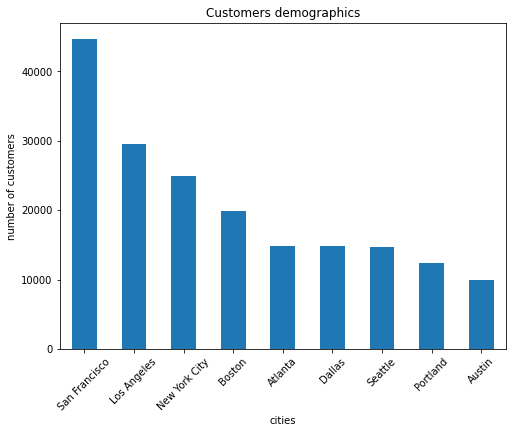

In [209]:
demography.plot(kind="bar", title="Customers demographics", figsize=(8,6), ylabel="number of customers", xlabel="cities")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=["San Francisco", "Los Angeles", "New York City", "Boston", "Atlanta", "Dallas", "Seattle", "Portland", "Austin"], rotation=45);

most of the customers are from SanFrancisco, followed by Los Angelles, then New York, Austin is the least in the demography of the customers

In [210]:
revenue = combined_sales.groupby("demography")["sales_price"].sum().sort_values(ascending=False)
revenue

demography
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: sales_price, dtype: float64

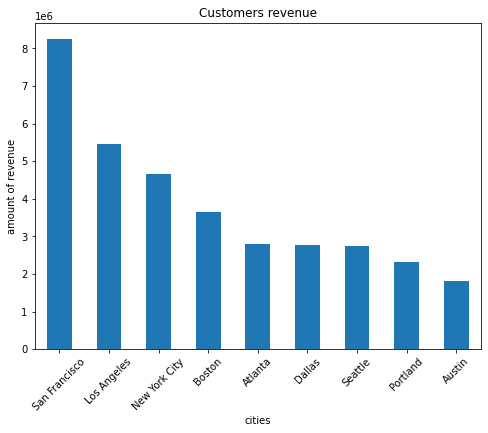

In [215]:
revenue.plot(kind="bar", title="Customers revenue", figsize=(8,6), ylabel="amount of revenue", xlabel="cities")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=["San Francisco", "Los Angeles", "New York City", "Boston", "Atlanta", "Dallas", "Seattle", "Portland", "Austin"], rotation=45);

as seen with the amount each demographic generated, the rate of increase in the number of customers in the demographic is directly proprtional to the amount of money generated from the demographic, the graphs look the same. more customers means more money

In [218]:
#how much did the highest demography genearted in the highest month of sales
highest_month_demo = combined_sales[(combined_sales["month"] == 12) & (combined_sales["demography"] == "San Francisco")]
highest_month_demo

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_price,demography
314,279095,AA Batteries (4-pack),2.0,3.84,2019-12-01 01:13:00,"134 North St, San Francisco, CA 94016",12,7.68,San Francisco
5120,283689,AAA Batteries (4-pack),1.0,2.99,2019-12-01 03:28:00,"848 Walnut St, San Francisco, CA 94016",12,2.99,San Francisco
7251,285731,AAA Batteries (4-pack),4.0,2.99,2019-12-01 00:02:00,"786 Hill St, San Francisco, CA 94016",12,11.96,San Francisco
11686,289958,20in Monitor,1.0,109.99,2019-12-01 00:46:00,"833 River St, San Francisco, CA 94016",12,109.99,San Francisco
11972,290233,Lightning Charging Cable,1.0,14.95,2019-12-01 01:40:00,"826 4th St, San Francisco, CA 94016",12,14.95,San Francisco
...,...,...,...,...,...,...,...,...,...
25104,319658,AAA Batteries (4-pack),2.0,2.99,2019-12-24 20:46:00,"574 Dogwood St, San Francisco, CA 94016",12,5.98,San Francisco
25105,319659,Lightning Charging Cable,1.0,14.95,2019-12-13 07:25:00,"764 1st St, San Francisco, CA 94016",12,14.95,San Francisco
25108,319662,Bose SoundSport Headphones,1.0,99.99,2019-12-31 19:07:00,"939 8th St, San Francisco, CA 94016",12,99.99,San Francisco
25110,319664,ThinkPad Laptop,1.0,999.99,2019-12-30 01:06:00,"767 2nd St, San Francisco, CA 94016",12,999.99,San Francisco


In [224]:
highest_month_demo["sales_price"].sum()

1106601.27

In [225]:
#how much did the highest demography genearted in the highest month of sales
dec_revenue = combined_sales[(combined_sales["month"] == 12)]
dec_revenue["sales_price"].sum()

4613443.339999999

In [226]:
highest_month_demo["sales_price"].sum() / dec_revenue["sales_price"].sum() * 100

23.9864497826476

In December, San Francisco alone generated about 24% of the december revenue in 2019

In [280]:
product = combined_sales["Product"].value_counts(normalize=True) * 100
product

USB-C Charging Cable          11.778973
Lightning Charging Cable      11.647217
AAA Batteries (4-pack)        11.100296
AA Batteries (4-pack)         11.065878
Wired Headphones              10.154343
Apple Airpods Headphones       8.361925
Bose SoundSport Headphones     7.165905
27in FHD Monitor               4.037107
iPhone                         3.679484
27in 4K Gaming Monitor         3.350363
34in Ultrawide Monitor         3.324012
Google Phone                   2.971229
Flatscreen TV                  2.581339
Macbook Pro Laptop             2.540468
ThinkPad Laptop                2.219952
20in Monitor                   2.205432
Vareebadd Phone                1.110514
LG Washing Machine             0.358161
LG Dryer                       0.347405
Name: Product, dtype: float64

USB-C Charging Cable is the most sold product, followed by Lightning Charging Cable. the least sold products are LG washing machine and LG dryer

In [273]:
type(product)

pandas.core.series.Series

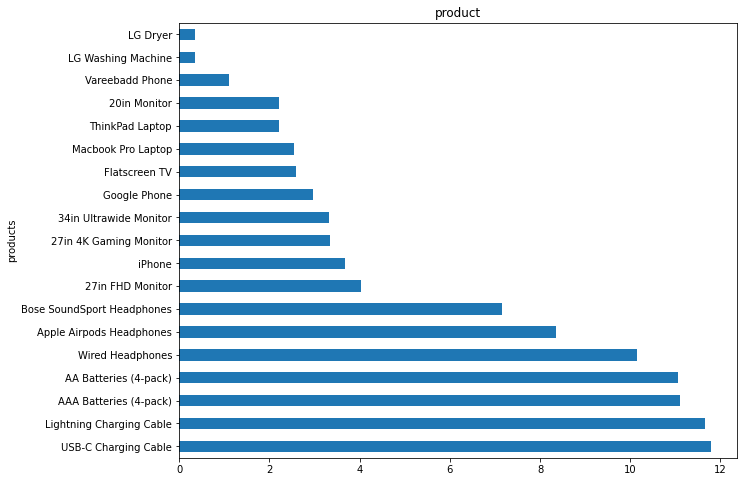

In [278]:
product.plot(kind="barh", figsize=(10,8), ylabel="products")
plt.title("product");

USB-C Charging Cable is the most sold product while the LG washing machine and dryer is the least sold product

the number of washing machine sold is close to the dryer which indicates the duo are probably always bought together

around 12% of those that will order will order USB-C

around 12% of those that will order will order Lightning Charging Cable

around 11% of those that will order will order AAA Batteries (4-pack)

around 10% of those that will order will order wired head phone

less than 0.5% will order the washing machine

less than 0.5% will also order the dryer